# Neste notebook estarei buscando responder:

Quantos contratos foram assinados por mês a cada ano?

Qual o valor médio de contrato por ano?

Há alguma tendência (mais contratos em certos períodos)?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 5)
sns.set(style = 'whitegrid')

In [4]:
ARQ = '../base_dados/bd_2.csv'

df = pd.read_csv(
    ARQ,
    sep = ';',
    decimal = ',',
    encoding = 'latin1'
)

pd.set_option('display.float_format', lambda x: '%.4f' % x)

df['pp_consorcio'] = df['pp_consorcio'].round(4)

In [5]:
# Convertendo 'data_de_assinatura' novamente pois o arquivo CSV não preserva o tipo 'datetime' de forma direta

df['data_de_assinatura'] = pd.to_datetime(df['data_de_assinatura'])

In [6]:
df['ano_mes'] = df['data_de_assinatura'].dt.to_period('M')

In [7]:
contratos_por_ano_mes = df['ano_mes'].value_counts().sort_index()

In [8]:
# Não me agradou, decidi fazer um por ano.
# plt.figure(figsize=(20, 6))
# contratos_por_ano_mes.plot(kind='bar', color='skyblue')
# plt.title("Número de Contratos Assinados por Ano/Mês", fontsize=16)
# plt.xlabel("Ano/Mês")
# plt.ylabel("Número de Contratos")
# plt.xticks(rotation=45)
# plt.show()

In [8]:
df['ano'] = df['data_de_assinatura'].dt.year
df['mes'] = df['data_de_assinatura'].dt.month

contratos_por_ano = df['ano'].value_counts().sort_index()
# print(contratos_por_ano)

In [10]:
# Exemplo de código para criar um grafico de colunas com os rótulos:

# grafico = sns.barplot(x = contratos_por_ano.index, y = contratos_por_ano.values, palette = 'crest', hue = contratos_por_ano, legend = False, orient = 'v')

# for p in grafico.patches:
#     grafico.annotate(f'{p.get_height():,.0f}', 
#                      (p.get_x() + p.get_width() / 2., p.get_height()), 
#                      ha = 'center', va = 'center', 
#                      fontsize = 10, color = 'black', 
#                      xytext=(0, 5), textcoords = 'offset points')

# Exemplo de código para criar um grafico de barras com os rótulos:

# grafico = sns.barplot(y=contratos_por_ano.index, x=contratos_por_ano.values, palette='crest', hue=contratos_por_ano, legend=False, orient='h')

# for p in grafico.patches:
#     grafico.annotate(f'{p.get_width():,.0f}', 
#                      (p.get_width(), p.get_y() + p.get_height() / 2), 
#                      ha = 'left', va = 'center', 
#                      fontsize = 10, color = 'black', 
#                      xytext=(5, 0), textcoords = 'offset points')

# O loop para por os rótulos dos gráficos são substituídos por:

# for container in grafico.containers:
#     grafico.bar_label(container, fmt='%.0f', padding=5)

# usar fmt='{:,.0f}' para adicionar o separador de milhar
# fmt .0f deixa 0 casas decimais

### Quantos contratos foram assinados por ano? 

Aqui estamos analisando o **número de contratos assinados por ano**.

O gráfico a seguir exibe o número de contratos assinados por **ano**.

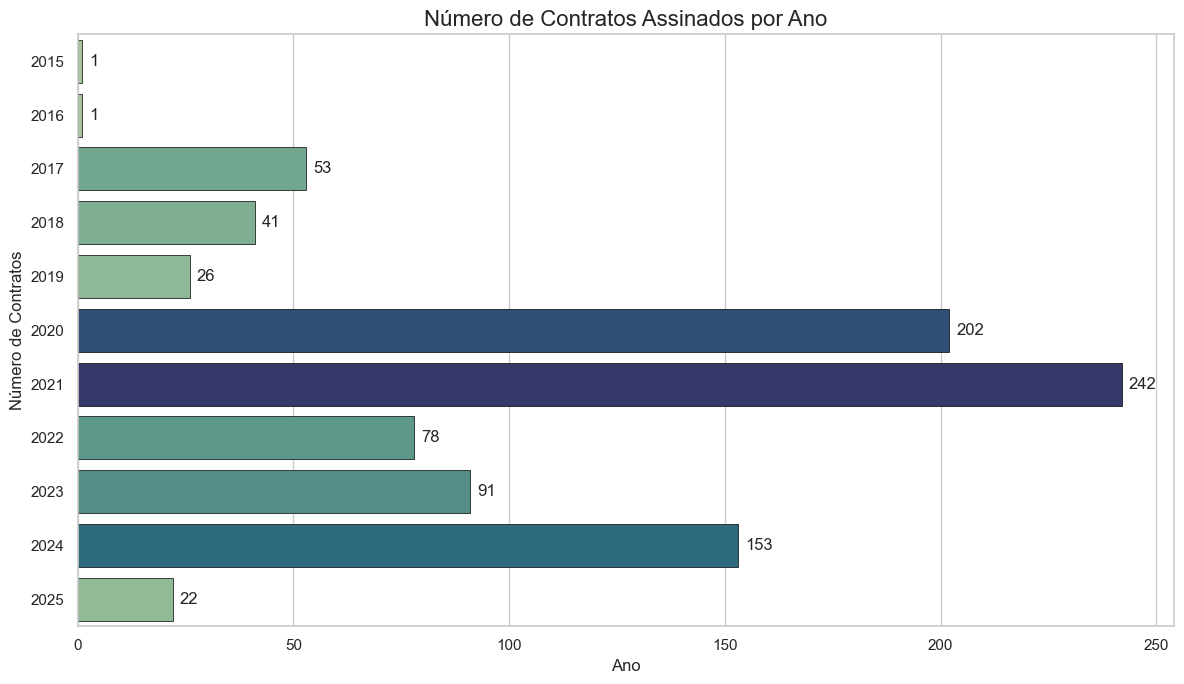

In [9]:
plt.figure(figsize=(12, 7))

grafico = sns.barplot(y=contratos_por_ano.index,
                      x=contratos_por_ano.values, 
                      palette='crest', 
                      hue=contratos_por_ano, 
                      legend=False, 
                      orient='h', 
                      edgecolor='black',
                      linewidth=0.5)

for container in grafico.containers:
    grafico.bar_label(container, fmt='%.0f', padding=5)

# for p in grafico.patches:
#     grafico.annotate(f'{p.get_width():,.0f}', 
#                      (p.get_width(), p.get_y() + p.get_height() / 2), 
#                      ha = 'left', va = 'center', 
#                      fontsize = 10, color = 'black', 
#                      xytext=(5, 0), textcoords = 'offset points')
    
plt.title('Número de Contratos Assinados por Ano', fontsize=16)
plt.xlabel('Ano')
plt.ylabel('Número de Contratos')
plt.tight_layout() 
plt.show()

### Quantos contratos foram assinados por mês em cada ano? 

Aqui estamos analisando o **número de contratos assinados por mês**.

A sequência de gráficos a seguir exibe o número de contratos assinados por **mês** para cada **ano** na base de dados.

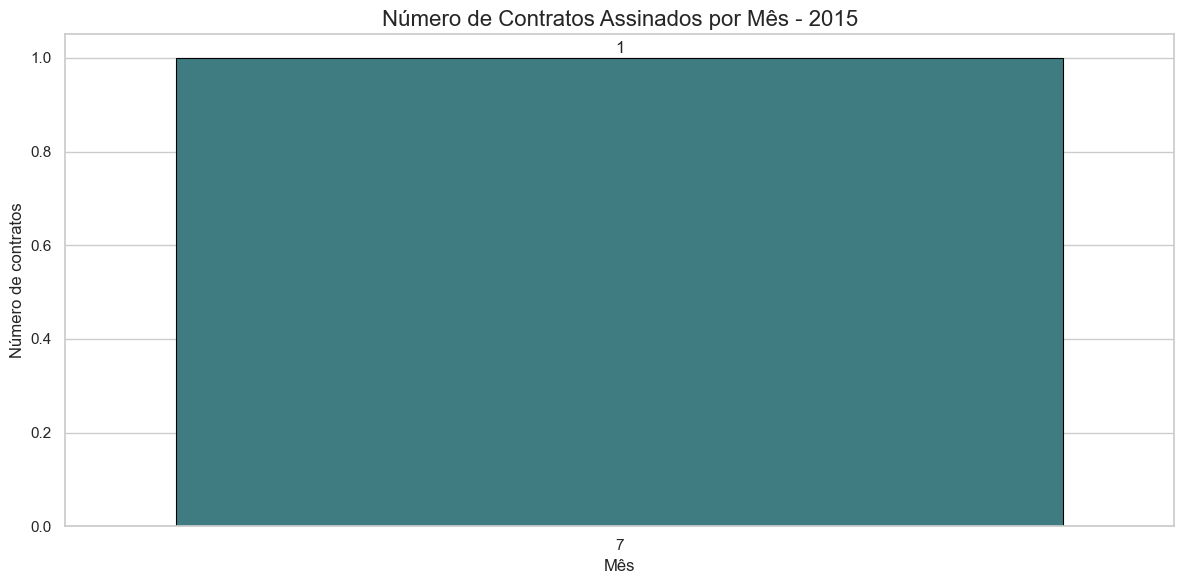

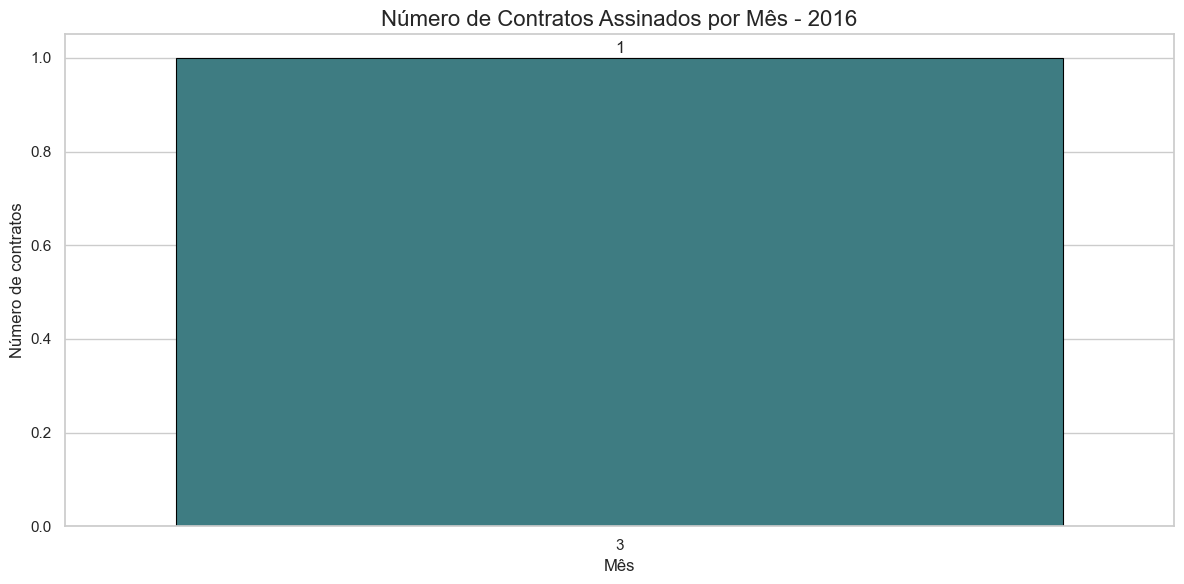

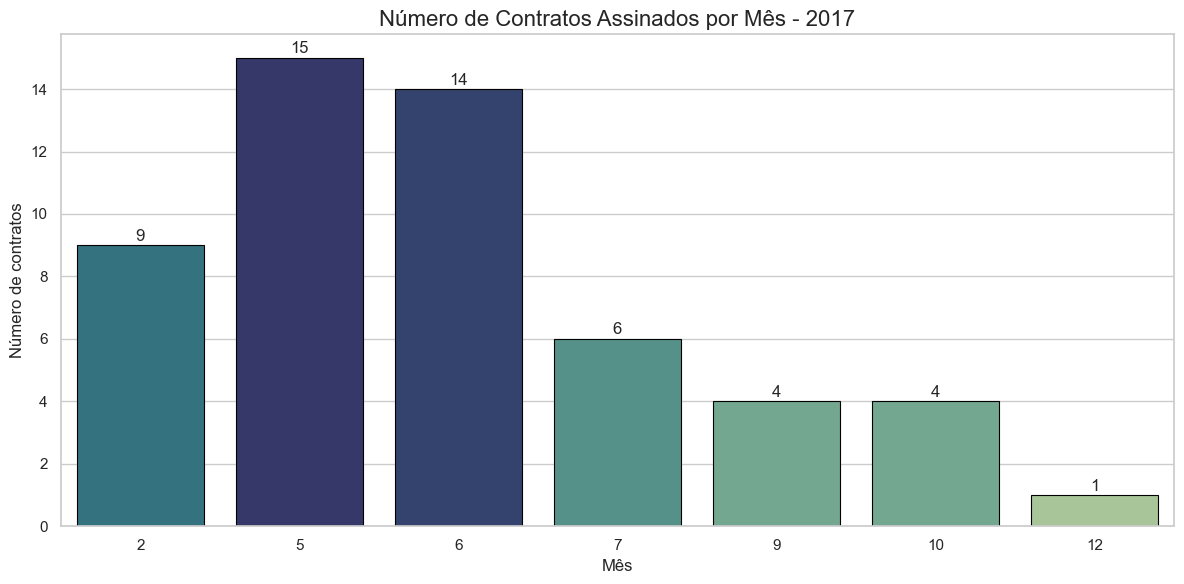

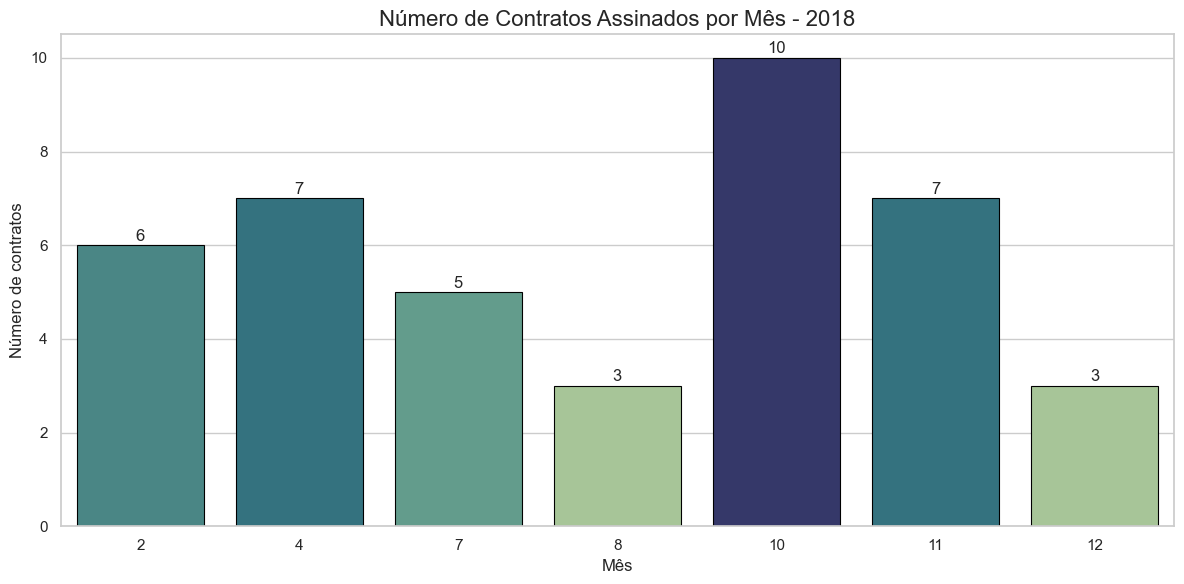

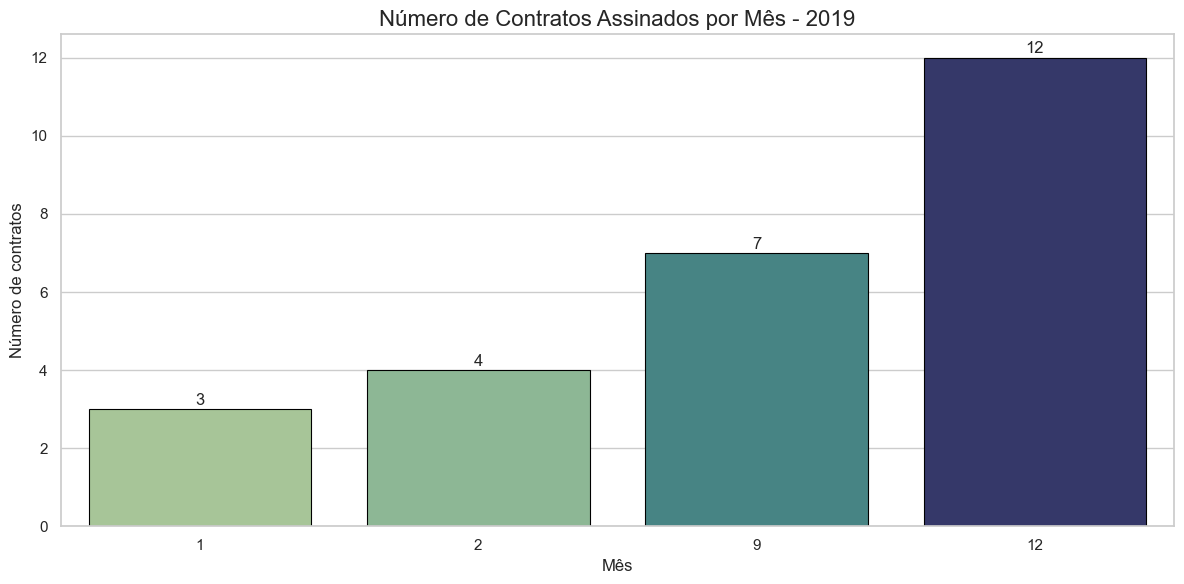

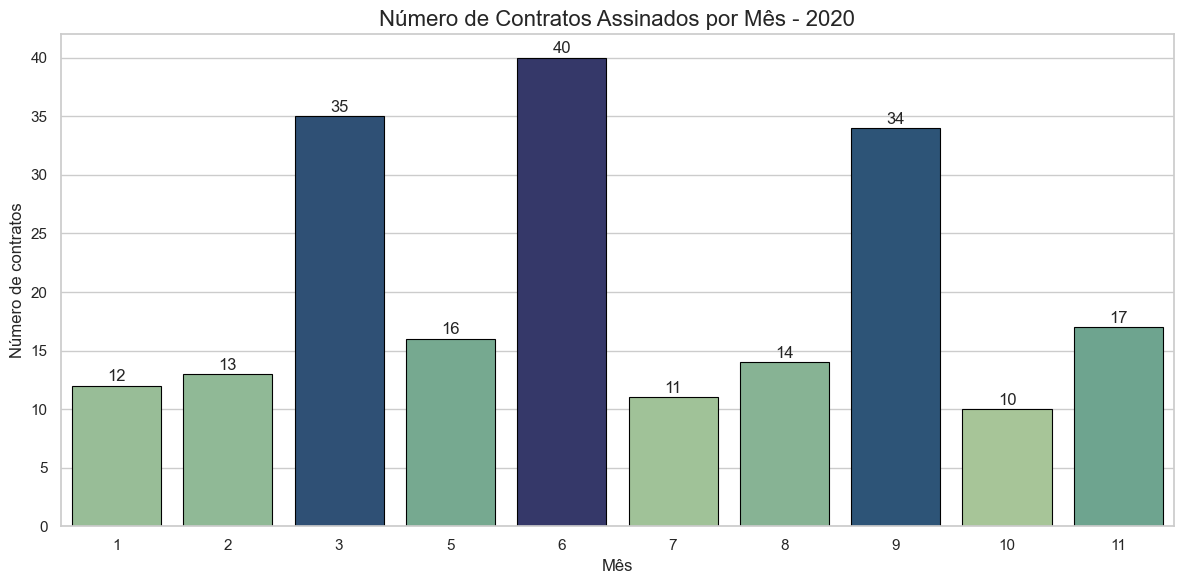

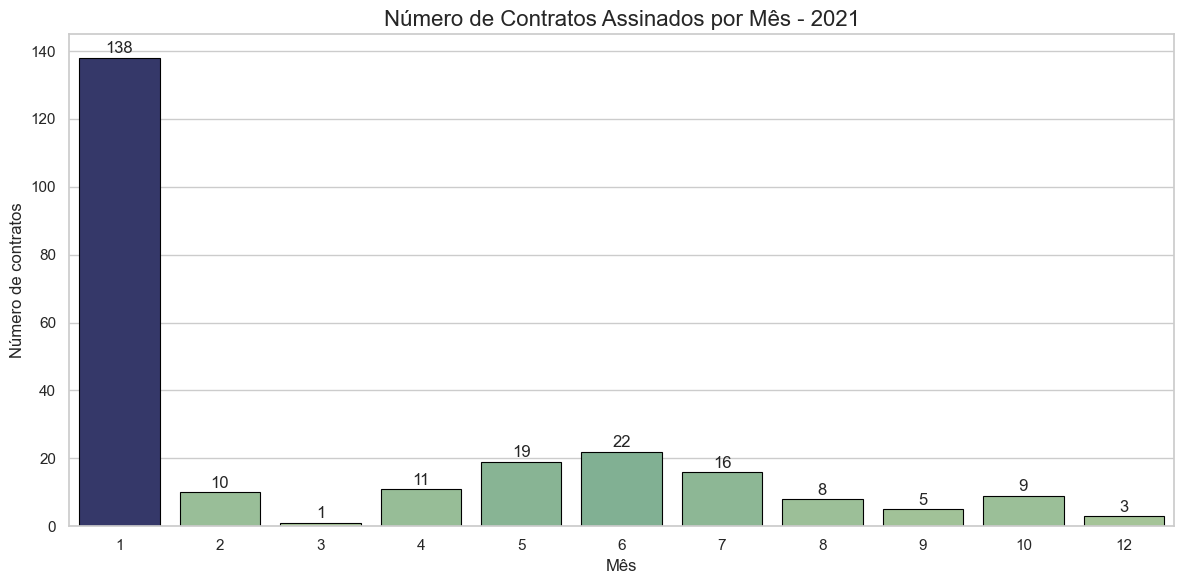

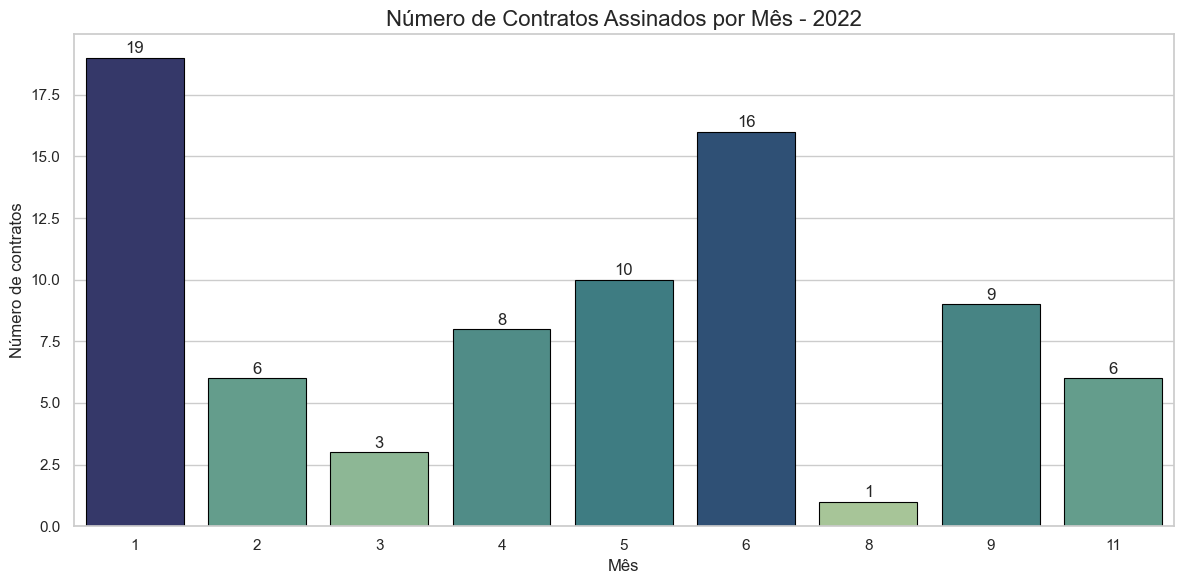

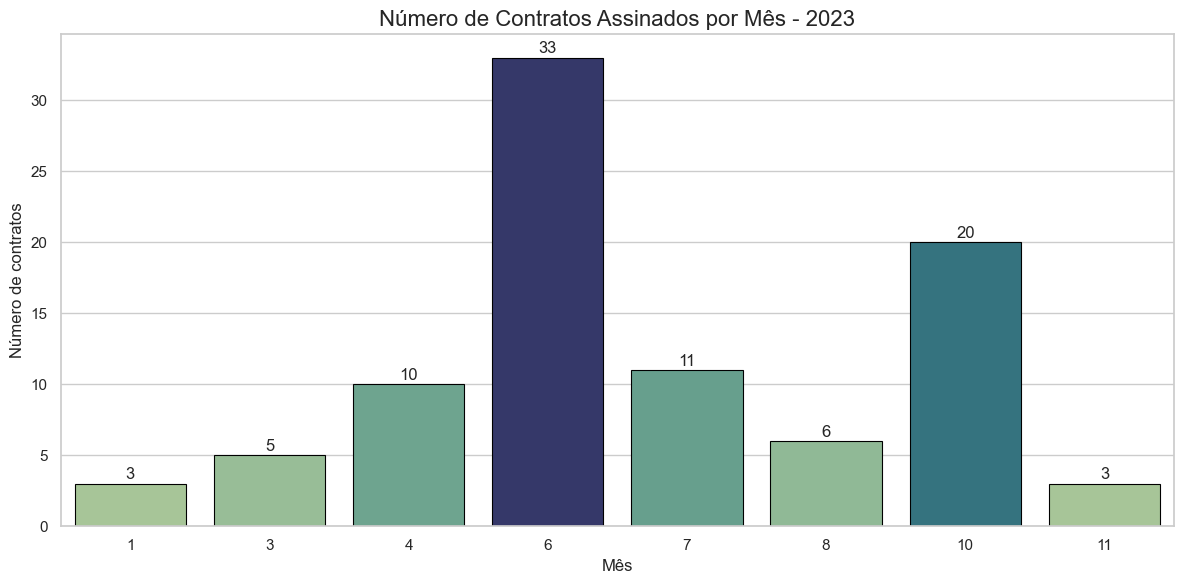

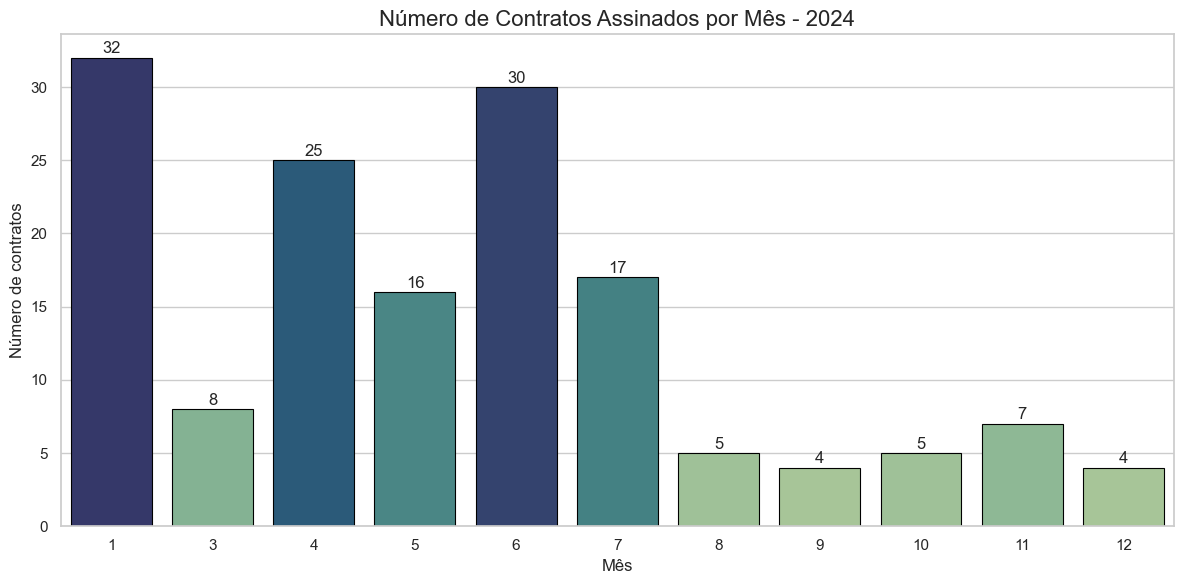

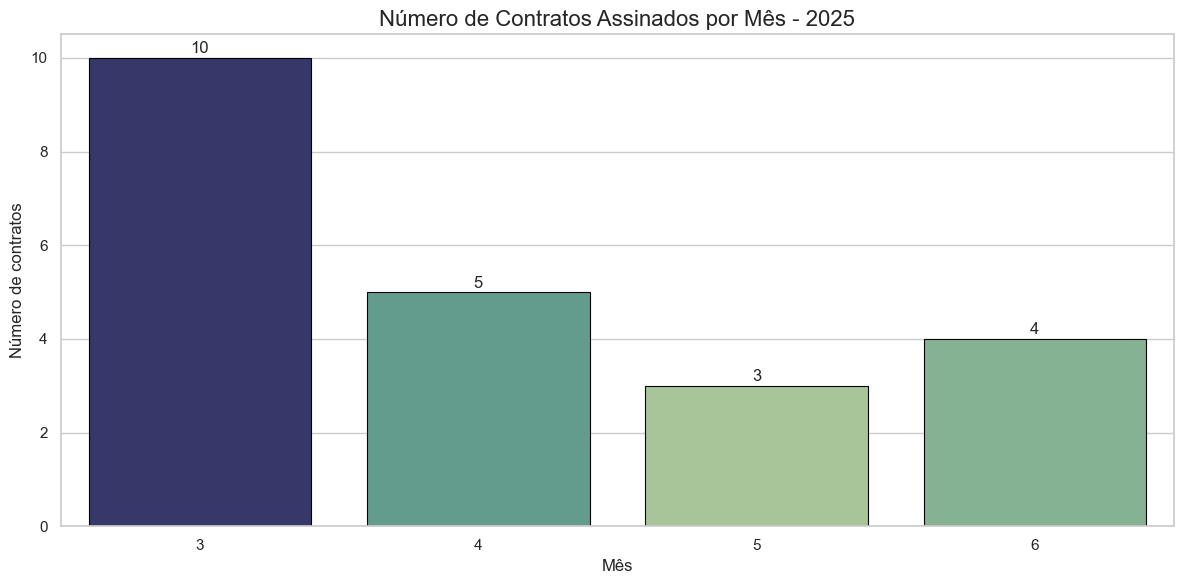

In [10]:
anos = sorted(df['data_de_assinatura'].dt.year.unique())

contratos_por_mes_por_ano = {}

for ano in anos:
    df_ano = df[df['data_de_assinatura'].dt.year == ano]
    
    df_ano.loc[:, 'mes'] = df_ano['data_de_assinatura'].dt.month
    
    contratos_por_mes_por_ano[ano] = df_ano['mes'].value_counts().sort_index()

    plt.figure(figsize=(12, 6))
    grafico = sns.barplot(x=contratos_por_mes_por_ano[ano].index, 
                          y=contratos_por_mes_por_ano[ano].values, 
                          palette='crest', 
                          hue = contratos_por_mes_por_ano[ano], 
                          edgecolor='black',
                          linewidth=0.8,
                          legend = False)

    for container in grafico.containers:
        grafico.bar_label(container, fmt='%.0f', padding=1)

    # for p in grafico.patches:
    #     grafico.annotate(f'{p.get_height():,.0f}', 
    #                  (p.get_x() + p.get_width() / 2., p.get_height()), 
    #                  ha = 'center', va = 'center', 
    #                  fontsize = 10, color = 'black', 
    #                  xytext=(0, 5), textcoords = 'offset points')


    plt.title(f'Número de Contratos Assinados por Mês - {ano}', fontsize=16)
    plt.ylabel('Número de contratos', fontsize=12)
    plt.xlabel('Mês', fontsize=12)

    plt.tight_layout()
    plt.show()

### Qual o valor médio de contrato por ano?

Aqui estamos analisando o **valor médio dos contratos** por ano.

O gráfico a seguir exibe o **valor médio** dos contratos **por ano**.

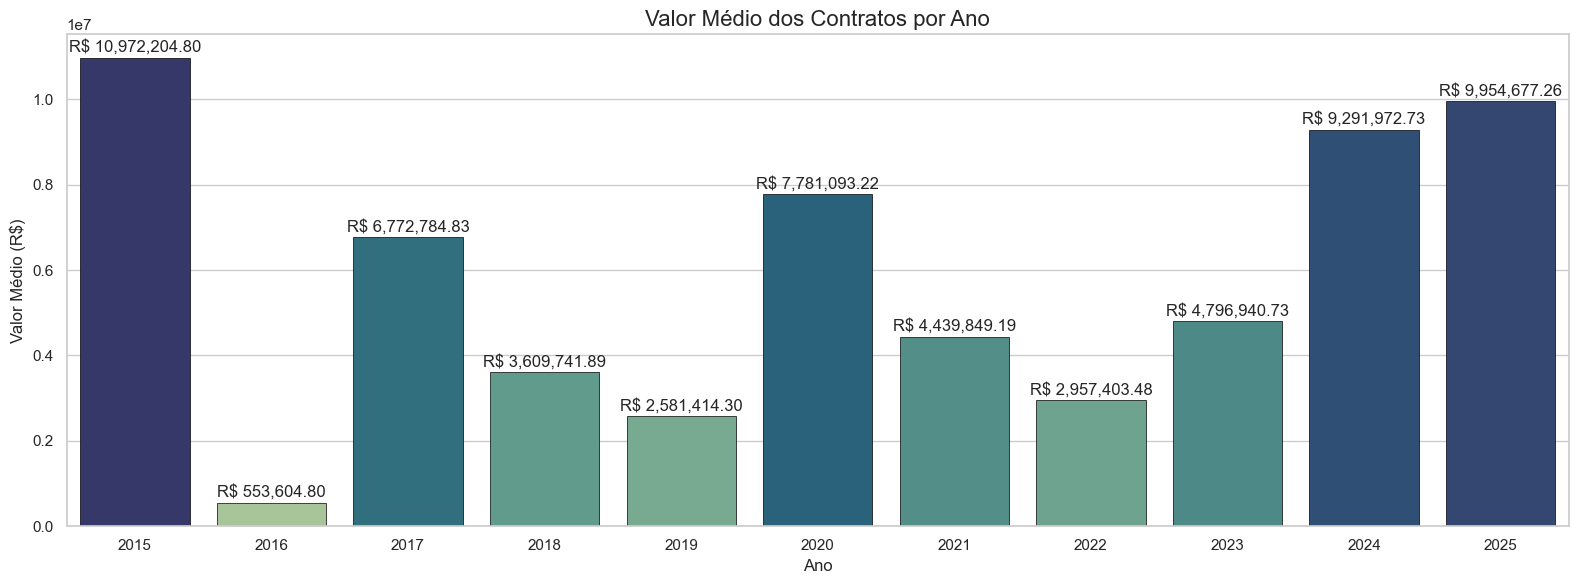

In [12]:
valor_medio_por_ano = df.groupby('ano')['valor_global_contrato_reais'].mean().round(2)

plt.figure(figsize=(16,6))
grafico = sns.barplot(x=valor_medio_por_ano.index,
                      y=valor_medio_por_ano.values,
                      hue = valor_medio_por_ano,
                      palette="crest",
                      edgecolor="black",
                      linewidth=0.5,
                      legend=False
                      )

for container in grafico.containers:
    grafico.bar_label(container, fmt='R$ {:,.2f}', padding=2)

plt.title("Valor Médio dos Contratos por Ano", fontsize=16)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Valor Médio (R$)", fontsize=12)
plt.tight_layout()
plt.show()

In [60]:
df_2020 = df[df['data_de_assinatura'].dt.year == 2020]

clientes_2020 = df_2020['cliente'].value_counts()

df_2021 = df[df['data_de_assinatura'].dt.year == 2021]

clientes_2021 = df_2021['cliente'].value_counts()

df_2024 = df[df['data_de_assinatura'].dt.year == 2024]

clientes_2024 = df_2024['cliente'].value_counts()

# moda_cliente = clientes_2024.idxmax()
# print(f"Cliente mais frequente em 2024: {moda_cliente} ({clientes_2024.max()} contratos)")

print('Top 3 clientes 2020')
print(clientes_2020.head(3))

print('Top 3 clientes 2021')
print(clientes_2021.head(3))

print('Top 3 clientes 2024')
print(clientes_2024.head(3))

Top 3 clientes 2020
cliente
MINISTERIO DA FAZENDA           71
MINISTERIO DA INFRAESTRUTURA    34
ESTADO DO RIO GRANDE DO SUL     26
Name: count, dtype: int64
Top 3 clientes 2021
cliente
ESTADO DO RIO GRANDE DO SUL    25
MUNICIPIO DO RECIFE            24
ESTADO DE MINAS GERAIS         24
Name: count, dtype: int64
Top 3 clientes 2024
cliente
ESTADO DE MINAS GERAIS         45
MUNICIPIO DE CURITIBA          20
ESTADO DO RIO GRANDE DO SUL    10
Name: count, dtype: int64


### Há alguma tendência (mais contratos em certos períodos)?

A análise dos gráficos mostra que existem, sim, tendências no volume de contratos assinados ao longo do tempo.

Os **anos de 2020** e **2021** registraram picos significativos, justamente durante o auge da pandemia de **Covid-19**, com **2021 sendo o ano de maior número de contratos**.

Outro destaque é **2024**, marcado por situações críticas no Brasil: as enchentes no **Rio Grande do Sul** e a **emergência de saúde pública** devido ao aumento expressivo de casos de **dengue e chikungunya em Minas Gerais**. Nesse ano, os principais contratantes foram o **Estado de Minas Gerais**, o **Município de Curitiba** e o **Estado do Rio Grande do Sul**, respectivamente.

Em resumo, a tendência observada é que a demanda por serviços aumenta consideravelmente em **momentos de crise e maior necessidade pública**.